# Zestaw zadań: Interpolacja
## Zadanie 1
### Autor: Artur Gęsiarz

In [162]:
import numpy as np
import matplotlib.pyplot as plt

### Populacja Stanów Zjednoczonych na przestrzeni lat

In [163]:
population_US = {
    1900: 76212168,
    1910: 92228496,
    1920: 106021537,
    1930: 123202624,
    1940: 132164569,
    1950: 151325798,
    1960: 179323175,
    1970: 203302031,
    1980: 226542199
}

years = np.array(list(population_US.keys()))
population = np.array(list(population_US.values()))

population_US_rounded = {year: round(population, -6) for year, population in population_US.items()}
rounded_population = np.array(list(population_US_rounded.values()))

### Wyznacznie wszystkich podanych bazowych czterech funkcji dla j = 1,...,9

In [164]:
first_base_function = [lambda t, j=i: pow(t,j - 1) for i in range(1,10)]
second_base_function = [lambda t, j=i: pow(t - 1900, j - 1) for i in range(1,10)]
third_base_function = [lambda t, j=i: pow(t - 1940, j - 1) for i in range(1,10)]
fourth_base_function = [lambda t, j=i: pow((t - 1940)/40, j - 1) for i in range(1,10)]

### Implementacja funkcji Vandermonde

In [165]:
def vandermonde_matrix(population: dict, base_functions):
    n = len(population.keys())
    m = len(base_functions)
    V = np.zeros((n, m))
    row = -1
    for year in population.keys():
        row += 1
        for j in range(m):
            V[row][j] = base_functions[j](year)
    return V

### Wyznaczanie dla kazdego ze zbiorow funkcji bazowych macierz Vandermone

In [166]:
V_first = vandermonde_matrix(population_US, first_base_function)
V_second = vandermonde_matrix(population_US, second_base_function)
V_third = vandermonde_matrix(population_US, third_base_function)
V_fourth = vandermonde_matrix(population_US, fourth_base_function)

### Współczynnik uwarunkowania każdej z powyższch macierzy

In [167]:
cond_first = np.linalg.cond(V_first)
cond_second = np.linalg.cond(V_second)
cond_third = np.linalg.cond(V_third)
cond_fourth = np.linalg.cond(V_fourth)

print(cond_first)
print(cond_second)
print(cond_third)
print(cond_fourth)

4.377811242696482e+37
6211148482504961.0
9315536040586.037
1605.4437004786669


### Używając najlepiej uwarunkowanej bazy wielomianów, znajduje współczynniki wielomianu interpolacyjnego

In [168]:
V_best = V_fourth
coefficients = np.linalg.solve(V_best, population)  # wspolczynniki

In [169]:
def polynomial_interpolation(coefficients, base_functions, year):
    """
    Funkcja zwraca interpolacje wielomianowa dla danego roku uzywjac schmatu Hornera
    :param coefficients: Lista wspolczynnikow wielomianu interpolacyjnego
    :param base_functions: Lista funkcji bazwoych, ktora sa uzywny do konstrukcji wielomianu
    :param year: Rok dla ktorego chcemy obliczyc wartosc wielomianu interpolacyjnego
    :return:
    """
    result = 0
    for i in range(len(coefficients)):
        result += coefficients[i] * base_functions[i](year)
    return result

### Narysowanie wielomianu interpolacyjnego

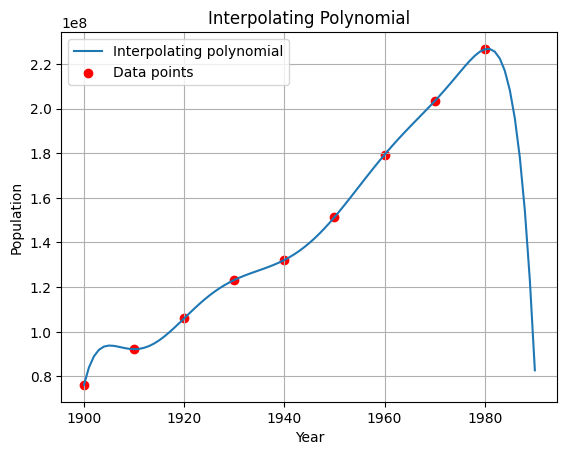

In [170]:
x_values = np.arange(1900, 1991)
y_values = polynomial_interpolation(coefficients, fourth_base_function, x_values)

plt.plot(x_values, y_values, label='Interpolating polynomial')
plt.scatter(years, population, color='red', label='Data points')
plt.title('Interpolating Polynomial')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

### Ekstrapolacja wielomianu do roku 1990 z prawdziwa wartoscia

In [171]:
extrapolated_population = polynomial_interpolation(coefficients, fourth_base_function, 1990)
true_population_1990 = 248709873
relative_error = abs(extrapolated_population - true_population_1990) / true_population_1990

print("Ekstrapolowana populacja w roku 1990:", round(extrapolated_population,3))
print("Prawdziwa populacja w roku 1990:", round(true_population_1990,3))
print("Błąd względny ekstrapolacji dla roku 1990 w procentach wynosi:", round(relative_error,3) * 100)

Ekstrapolowana populacja w roku 1990: 82749140.99999833
Prawdziwa populacja w roku 1990: 248709873
Błąd względny ekstrapolacji dla roku 1990 w procentach wynosi: 66.7


### Wielomian interpolacyjny Lagrange’a

In [172]:
def lagrange_interpolation(x, y, x_interp):
    """
    Funkcja ta wynkonuje interpolacje Lagrange'a dla zestawu punktow (x,y) w celu uzyskania wartosci interpolowanej  dla okerslonych punktow interpolacji x_inyerp
    :param x: Jest to tablica zawierająca współrzędne x punktów danych.
    :param y: Jest to tablica zawierająca odpowiadające współrzędne y punktów danych.
    :param x_interp: est to tablica zawierająca współrzędne x, dla których chcemy wykonać interpolację.
    :return: Wynikowa tablica result zawiera wartości interpolowane dla każdego punktu w x_interp
    """
    n = len(x)
    m = len(x_interp)
    result = np.zeros(m)

    for i in range(m):
        interpolated_value = 0
        for j in range(n):
            term = y[j]
            for k in range(n):
                if k != j:
                    term *= (x_interp[i] - x[k]) / (x[j] - x[k])
            interpolated_value += term
        result[i] = interpolated_value

    return result

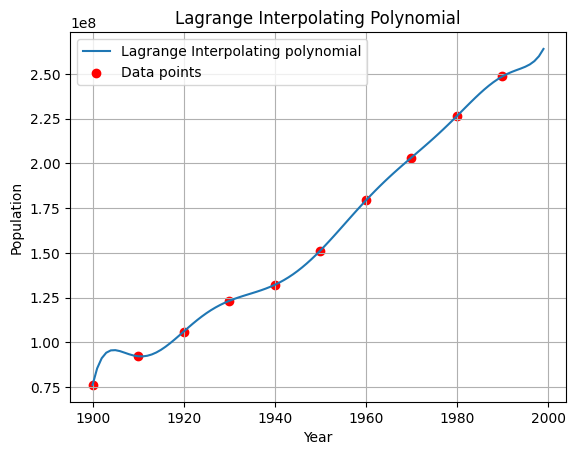

In [173]:
population_US_years_added = list(population_US.keys())
population_US_years_added.append(1990)

population_US_population_added = list(population_US.values())
population_US_population_added.append(true_population_1990)

x = np.array(population_US_years_added)
y = np.array(population_US_population_added)


x_interp = np.arange(1900, 2000)
y_interp = lagrange_interpolation(x, y, x_interp)

plt.plot(x_interp, y_interp, label='Lagrange Interpolating polynomial')
plt.scatter(x, y, color='red', label='Data points')
plt.title('Lagrange Interpolating Polynomial')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

### Wielomian interpolacyjny Newtona

In [174]:
def divided_differences(x, y):
    """
    Funkcja oblicza różnice dzielone dla zestawu punktów (x, y) za pomocą metody Newtona.
    Różnice dzielone wykorzystywane są później do konstrukcji wielomianu interpolacyjnego
    :param x: Jest to tablica zawierająca współrzędne x punktów danych.
    :param y: Jest to tablica zawierająca odpowiadające współrzędne y punktów danych.
    :return:
    """
    n = len(x)
    F = np.zeros((n, n))  # tworze macierz n na n
    F[:,0] = y  # wypelniam pierwsza kolumne wartosciami y

    for j in range(1, n):
        for i in range(j, n):
            F[i, j] = (F[i, j - 1] - F[i - 1, j - 1]) / (x[i] - x[i - j])

    return np.diag(F)

def newton_interpolation(x, y, x_interp):
    """
    Funkcja wykonuje interpolację Newtona dla zestawu punktów (x, y) w celu uzyskania wartości interpolowanej dla określonych punktów interpolacji x_interp.
    :param x: Jest to tablica zawierająca współrzędne x punktów danych.
    :param y: Jest to tablica zawierająca odpowiadające współrzędne y punktów danych.
    :param x_interp: Jest to tablica zawierająca współrzędne x, dla których chcemy wykonać interpolację.
    :return:  Wynikowa tablica result zawiera wartości interpolowane dla każdego punktu w x_interp
    """
    n = len(x)
    m = len(x_interp)
    coefficients = divided_differences(x, y)
    result = np.zeros(m)

    for i in range(m):
        interpolated_value = coefficients[0]
        term = 1
        for j in range(1, n):
            term *= (x_interp[i] - x[j - 1])
            interpolated_value += coefficients[j] * term
        result[i] = interpolated_value

    return result

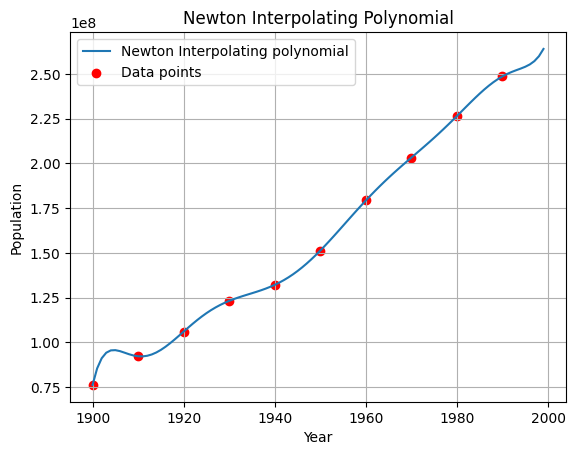

In [175]:
population_US_years_added = list(population_US.keys())
population_US_years_added.append(1990)

population_US_population_added = list(population_US.values())
population_US_population_added.append(true_population_1990)

x = np.array(population_US_years_added)
y = np.array(population_US_population_added)

x_interp = np.arange(1900, 2000)
y_interp = newton_interpolation(x, y, x_interp)

plt.plot(x_interp, y_interp, label='Newton Interpolating polynomial')
plt.scatter(x, y, color='red', label='Data points')
plt.title('Newton Interpolating Polynomial')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

### Wielomian interpolacyjny z zaokrąglonymi danymi

In [176]:
V_rounded = vandermonde_matrix(population_US_rounded, fourth_base_function)
coefficients_rounded = np.linalg.solve(V_rounded, rounded_population)

print("Współczynniki wielomianu interpolacyjnego z zaokrąglonymi danymi:\n", coefficients_rounded, "\n")
print("Współczynniki wielomianu interpolacyjnego:\n", coefficients)

Współczynniki wielomianu interpolacyjnego z zaokrąglonymi danymi:
 [ 1.32000000e+08  4.59571429e+07  1.00141270e+08  1.81111111e+08
 -3.56755556e+08 -3.38488889e+08  5.70311111e+08  1.86920635e+08
 -2.94196825e+08] 

Współczynniki wielomianu interpolacyjnego:
 [ 1.32164569e+08  4.61307656e+07  1.02716315e+08  1.82527130e+08
 -3.74614715e+08 -3.42668456e+08  6.06291250e+08  1.89175576e+08
 -3.15180235e+08]


### Wyznacznie wielomianu interpolacyjnego z zakraglonymi danymi

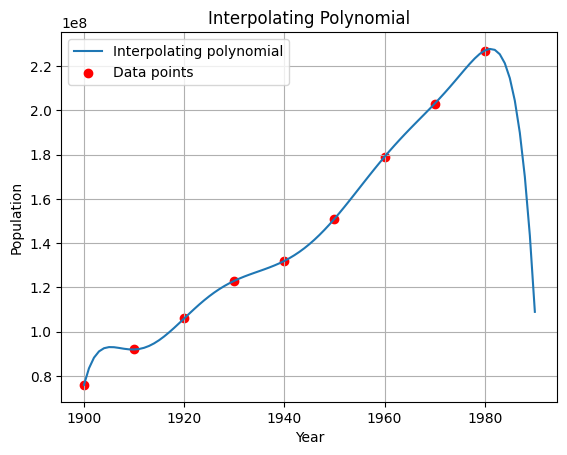

In [177]:
x_values = np.arange(1900, 1991)
y_values = polynomial_interpolation(coefficients_rounded, fourth_base_function, x_values)

plt.plot(x_values, y_values, label='Interpolating polynomial')
plt.scatter(years, rounded_population, color='red', label='Data points')
plt.title('Interpolating Polynomial')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

### Ekstrapolacja wielomianu przyblizonego do roku 1990 z prawdziwa wartoscia

In [178]:
extrapolated_population = polynomial_interpolation(coefficients_rounded, fourth_base_function, 1990)
true_population_1990 = 248709873
relative_error = abs(extrapolated_population - true_population_1990) / true_population_1990

print("Ekstrapolowana populacja w roku 1990:", round(extrapolated_population,3))
print("Prawdziwa populacja w roku 1990:", round(true_population_1990,3))
print("Błąd względny ekstrapolacji dla roku 1990 w procentach wynosi:", round(relative_error,3) * 100)

Ekstrapolowana populacja w roku 1990: 109000000.0
Prawdziwa populacja w roku 1990: 248709873
Błąd względny ekstrapolacji dla roku 1990 w procentach wynosi: 56.2
